<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**: AmirMohamamd Yousefi

**Student ID**: 99102531

# Linear Regression

In this exercise, we want to examine **linear regression**. For this purpose, we have prepared a dataset in the `q1.csv` file. This dataset is used to estimate the **heating load** and **cooling load** of a building based on its parameters. The parameters in this dataset are explained below:

- $X_1$: Relative Compactness
- $X_2$: Surface Area
- $X_3$: Wall Area
- $X_4$: Roof Area
- $X_5$: Overall Height
- $X_6$: Orientation
- $X_7$: Glazing Area
- $X_8$: Glazing Area Distribution
- $Y_1$: Heating Load
- $Y_2$: Cooling Load

**Note**: For the sake of simplicity, we will only focus on estimating the **heating load** in this problem. Also, please note that we have some inline questions in this notebook, for which you should write your answers in the **Answer** section below each question.

## Importing Libraries

First we import libraries that we need for this assignment.

**Attention**: You should only use these libraries. Other libraries are not acceptable.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the building (`X1`, `X2`, ..., `X8`) and heating load (`Y1`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [20]:
X, Y = None, None

### START CODE HERE ###
datas = pd.read_csv('q1.csv')
X = np.array(datas.iloc[:,0:8])
Y = np.array(datas.iloc[:,8:9])
### END CODE HERE ###

print(X.shape)
print(Y.shape)
print(X)
print(Y)

(768, 8)
(768, 1)
[[9.800e-01 5.145e+02 2.940e+02 ... 2.000e+00 0.000e+00 0.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 3.000e+00 0.000e+00 0.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 4.000e+00 0.000e+00 0.000e+00]
 ...
 [6.200e-01 8.085e+02 3.675e+02 ... 3.000e+00 4.000e-01 5.000e+00]
 [6.200e-01 8.085e+02 3.675e+02 ... 4.000e+00 4.000e-01 5.000e+00]
 [6.200e-01 8.085e+02 3.675e+02 ... 5.000e+00 4.000e-01 5.000e+00]]
[[15.55]
 [15.55]
 [15.55]
 [15.55]
 [20.84]
 [21.46]
 [20.71]
 [19.68]
 [19.5 ]
 [19.95]
 [19.34]
 [18.31]
 [17.05]
 [17.41]
 [16.95]
 [15.98]
 [28.52]
 [29.9 ]
 [29.63]
 [28.75]
 [24.77]
 [23.93]
 [24.77]
 [23.93]
 [ 6.07]
 [ 6.05]
 [ 6.01]
 [ 6.04]
 [ 6.37]
 [ 6.4 ]
 [ 6.37]
 [ 6.4 ]
 [ 6.85]
 [ 6.79]
 [ 6.77]
 [ 6.81]
 [ 7.18]
 [ 7.1 ]
 [ 7.1 ]
 [ 7.1 ]
 [10.85]
 [10.54]
 [10.77]
 [10.56]
 [ 8.6 ]
 [ 8.49]
 [ 8.45]
 [ 8.5 ]
 [24.58]
 [24.63]
 [24.63]
 [24.59]
 [29.03]
 [29.87]
 [29.14]
 [28.09]
 [26.28]
 [26.91]
 [26.37]
 [25.27]
 [23.53]
 [24.03]
 [23.54]
 [22.58

Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**: because we want to compare datas from different features that have different ranges. for example if we want to compare the age and height of people we should normalize the data in order to compare them correctly. So if we want to effect of these features on our model be similar we should normalize them.

In [21]:
### START CODE HERE ###
for i in range(8):
    mean_of_x = np.mean(X[:,i])
    sigma_x = np.std(X[:,i])
    X[:,i] = (X[:,i] - mean_of_x) / (sigma_x)

mean_of_y = np.mean(Y)
sigma_y = np.std(Y)
Y = (Y - mean_of_y) / (sigma_y)
### END CODE HERE ###

Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [22]:
### START CODE HERE ###
ones = np.ones((len(X), 1))
X = np.concatenate([ones, X], axis=1)
### END CODE HERE ###

print(X.shape)

(768, 9)


## Training Model Using Direct Method

We know that the loss function in linear regression is defined as:

$$
\mathcal{L}(\mathbf{w}) = \frac{1}{m}\sum_{i=1}^{m}(\mathbf{w}^\top\mathbf{x}_i-y_i)^2
$$

Here, $w$ is the weight vector and $(x_i, y_i)$ represents the $i$th data point. First, write a function that takes $X$, $Y$, and $w$ as inputs and returns the loss value in the next cell. Note that your implementation should be fully vectorized, meaning that you are not allowed to use any loops in your function and should only use functions prepared in the numpy library.

In [36]:
def loss(X, Y, w):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  w: an (n+1) by 1 weight vector
  '''
  m, n = X.shape
  loss = None
  ### START CODE HERE ###
  loss = (np.matmul(X,w) - Y)
  loss = np.matmul(loss.T,loss)
  loss = loss / m
  ### END CODE HERE ###
  return loss

Now, we want to calculate the weight matrix, $w$, using the direct method. By direct method, we mean finding the answer to the optimization problem below directly using linear algebra, without using iterative methods:

$$
\min_{w} \mathcal{L}(w)
$$

Question: What is the answer to this problem in terms of $X$ and $Y$?

Answer:$$
\mathbf{w} = (\mathbf{x}^\top\mathbf{x})^{-1}\mathbf{x}^\top\mathbf{y}
$$

Now you should implement a function that receives $X$ and $Y$ as input and returns $w$. Note that your implementation should also be fully vectorized.

In [24]:
def direct_method(X, Y):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  '''
  w = None
  ### START CODE HERE ###
  w = np.matmul(np.matmul(np.linalg.pinv(np.matmul(X.T,X)), X.T), Y)
  ### END CODE HERE ###
  return w

Finally, we want to evaluate our loss for this problem. Run the cell below to calculate the loss of your model.

In [25]:
w = direct_method(X, Y) # calculating w using direct method
print(f"loss for this problem using direct method is {loss(X, Y, w)}")

loss for this problem using direct method is [[0.08379792]]


## Training Model Using Gradient Descent

Now, instead of using the direct method to calculate $w$, we want to use the **Gradient Descent** algorithm. We know that in this algorithm, in each iteration, we should update our weight vector with:

$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \alpha \nabla \mathcal{L}(\mathbf{w}^{(t)})
$$

Here, $w^{t}$ represents the weight matrix in the $t$th iteration, and $\alpha$ represents the learning rate.

**Question**: Write an expression for $\nabla\mathcal{L}(\mathbf{w})$.

**Answer**:

Now, write a function that computes the gradient of $\mathcal{L}(\mathbf{w})$. This function should receive $X$, $Y$, and $\mathbf{w}$ as inputs and return an $(n+1) \times 1$ vector, which represents $\nabla\mathcal{L}(\mathbf{w})$. Note that your implementation should also be **fully vectorized**.

In [26]:
def gradient(X, Y, w):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  w: an (n+1) by 1 weight vector
  '''
  m, n = X.shape
  grad = None
  ### START CODE HERE ###
  grad = np.matmul(X.T, np.matmul(X,w) - Y)
  grad = 2*grad/m
  ### END CODE HERE ###
  return grad

Now, we are ready to implement the Gradient Descent algorithm. Complete the function below for this purpose. Note that this function receives $X$, $Y$, the learning rate, and the number of iterations as inputs. This function should return two parameters. The first parameter is $\mathbf{w}$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code. Also note that you should initialize $\mathbf{w}$ with the `randn` function.

In [27]:
def gradient_descent(X, Y, alpha, num_iter):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  alpha: learning rate
  num_iter: number of iterations of the algorithm
  '''
  m, n = X.shape
  w, loss_history = None, None 
  ### START CODE HERE ###
  loss_history = np.zeros((num_iter+1))
  w = np.random.randn(n,1)
  l = loss(X,Y,w)
  loss_history[0] = l
  for i in range(num_iter):
      w = w - alpha*gradient(X, Y, w)
      l = loss(X,Y,w)
      loss_history[i+1]=l
  ### END CODE HERE ###
  return w, loss_history

Now, run the `gradient_descent` function for 5 different values of the learning rate. Plot the `loss_history` of these 5 different values in the same figure.

**Question**: Discuss the effect of the learning rate and find the best value of this parameter.

**Answer**: learning rate is a parameter that each time we update the model weight, control the change of the model scaled in response to the estimated error. choosing the learning rate is very difficult. if we choose tiny value for learning rate the convergence weill be very slow and if we choose large learning rate makes the convergence time very low but the model learnt the set of unoptimized weight or an unstable process. The best learning rate in this model is between 0.1 and 0.2.

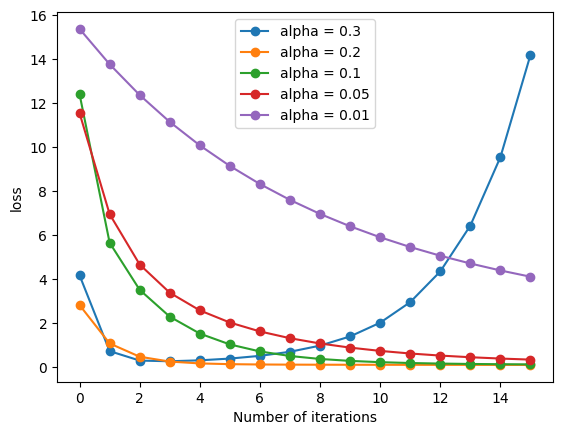

In [29]:
### START CODE HERE ###
[w , lh] = gradient_descent(X, Y, 0.3, 15)
plt.plot(lh , marker='o', label='alpha = 0.3')
[w , lh] = gradient_descent(X, Y, 0.2, 15)
plt.plot(lh , marker='o', label='alpha = 0.2')
[w , lh] = gradient_descent(X, Y, 0.1, 15)
plt.plot(lh , marker='o', label='alpha = 0.1')
[w , lh] = gradient_descent(X, Y, 0.05, 15)
plt.plot(lh , marker='o', label='alpha = 0.05')
[w , lh] = gradient_descent(X, Y, 0.01, 15)
plt.plot(lh , marker='o', label='alpha = 0.01')
plt.xlabel('Number of iterations')
plt.ylabel('loss')
plt.legend()
plt.show()
### END CODE HERE ###

## Conclusion

Compare the answer of two different methods that we used earlier.

**Question**: Discuss these two methods and compare them with each other. When is it better to use the direct method, and when is it better to use Gradient Descent?

**Answer**: The usage of these two methods is different. The direct method is used when we deal with a few dataset and ourdata set isn't very large because finding the inverse matrix is very tough but when we have large data set we should use gradient based method but in this method we should choose the learning rate truely.

## (Additional Part) Stochastic Gradient Descent

When the number of data points becomes large, calculating the gradient becomes very complicated. In these circumstances, we use **Stochastic Gradient Descent**. In this algorithm, instead of using all of the data points to calculate the gradient, we use only a small number of them. We choose these small number of points randomly in each iteration. Implement this algorithm, and use it to calculate $w$, and then compare the result with the preceding parts.

**Answer**: we can see when we use two methods mentioned before because we use all datas the convergence will occur very short and from a time we can see the change of w is very little. but when we use stochastic gradient because we use a part of the datas the w's changes among the time and w has much more variance than the two methods before.

In [35]:
def stochastic_gradient_descent(X, Y, k, alpha, num_iter):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  k: number of data points used in each iteration
  alpha: learning rate
  num_iter: number of iterations of the algorithm
  '''
  m, n = X.shape
  w, loss_history = None, None 
  ### START CODE HERE ###
  loss_history = np.zeros((num_iter+1))
  w = np.random.randn(n,1)
  X_Y = np.concatenate([X, Y], axis=1)
  X_Y_R = X_Y[np.random.randint(X_Y.shape[0], size=k), :]
  X_R = X_Y_R[:,0:n]
  Y_R = X_Y_R[:,n:n+1]
  L = loss(X_R,Y_R,w)
  loss_history[0] = L
  for i in range(num_iter):
      X_Y_R = X_Y[np.random.randint(X_Y.shape[0], size=k), :]
      X_R = X_Y_R[:,0:n]
      Y_R = X_Y_R[:,n:n+1]
      w = w - alpha*gradient(X_R, Y_R, w)
      L = loss(X_R,Y_R,w)
      loss_history[i+1] = L
  ### END CODE HERE ###
  return w, loss_history

w = direct_method(X, Y)
print('calculating w using direct method = ')
print(w)
[w , lh] = gradient_descent(X, Y, 0.15, 20)
print('calculating w using Gradient Descent = ')
print(w)
[w , lh] = stochastic_gradient_descent(X, Y, 300, 0.15, 20)
print('calculating w using Stochastic Gradient Descent = ')
print(w)

calculating w using direct method = 
[[ 2.11202583e-16]
 [-6.79038297e-01]
 [-3.73577118e-01]
 [ 7.05448253e-02]
 [-3.98359602e-01]
 [ 7.23687495e-01]
 [-2.58653392e-03]
 [ 2.63170601e-01]
 [ 3.13216718e-02]]
calculating w using Gradient Descent = 
[[ 5.38271109e-04]
 [ 1.22113088e+00]
 [ 5.15992735e-01]
 [ 5.96594881e-01]
 [ 3.77197963e-01]
 [ 4.78760876e-01]
 [-1.70116713e-03]
 [ 2.64776163e-01]
 [ 2.98024545e-02]]
calculating w using Stochastic Gradient Descent = 
[[ 0.00237765]
 [-0.64234198]
 [ 0.26937523]
 [-0.24617811]
 [ 0.05478097]
 [ 1.83182826]
 [-0.0092373 ]
 [ 0.27354576]
 [ 0.04776045]]
